# Health insurance cross sell prediction

Predict Health Insurance Owners' who will be interested in Vehicle Insurance**

Your client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the customers from past year will also be interested in Vehicle Insurance provided by the company.

In [2]:
# import libraries
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split

In [3]:
#1Load the dataset
df=pd.read_csv("healthinsurance.csv")

In [4]:
#2 Load first 10 raws
df.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
#3 Load last 5 raws
df.tail(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [6]:
#4 Check the datastructure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [7]:
#4 find raws and columns
df.shape

(381109, 12)

In this dataset 381109 rows and 12 columns 

In [8]:
#5 describe the numerical columns
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [9]:
#6 Checking null values
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

in this dataset there is no null values

In [10]:
### 7 Getting all the unique value of the columns 

for column in df.columns:
    print(f"{column} :")
    print(df[column].unique())
    print("")

id :
[     1      2      3 ... 381107 381108 381109]

Gender :
['Male' 'Female']

Age :
[44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]

Driving_License :
[1 0]

Region_Code :
[28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]

Previously_Insured :
[0 1]

Vehicle_Age :
['> 2 Years' '1-2 Year' '< 1 Year']

Vehicle_Damage :
['Yes' 'No']

Annual_Premium :
[ 40454.  33536.  38294. ...  20706. 101664.  69845.]

Policy_Sales_Channel :
[ 26. 152. 160. 124.  14.  13.  30. 156. 163. 157. 122.  19.  22.  15.
 154.  16.  52. 155.  11. 151. 125.  25.  61.   1.  86.  31. 150.  23.
  60.  21. 121.   3. 139.  12.  29.  55.   7.  47. 127. 153.  78. 158.
  89.  32.   8.  10. 120.  65.   4.

In [11]:
# 8 Categorize categorical column
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

Gender
['Male' 'Female']
Vehicle_Age
['> 2 Years' '1-2 Year' '< 1 Year']
Vehicle_Damage
['Yes' 'No']


three columns are categorical column Gender Vehicle_Age, Vehicle_Damage 

In [12]:
#9.find features with one value
for column in df.columns:
    print(column,df[column].nunique())

id 381109
Gender 2
Age 66
Driving_License 2
Region_Code 53
Previously_Insured 2
Vehicle_Age 3
Vehicle_Damage 2
Annual_Premium 48838
Policy_Sales_Channel 155
Vintage 290
Response 2


In [13]:
#10 Categorical feature
categorical_features=[feature for feature in df.columns if((df[feature].dtypes=='object')&(feature not in ['Responce']))]
categorical_features

['Gender', 'Vehicle_Age', 'Vehicle_Damage']

In [14]:
#11 No of categorical feature items
for feature in categorical_features:
    print("the feature is{} and number of categories are:{} ".format(feature,len(df[feature].unique())))

the feature isGender and number of categories are:2 
the feature isVehicle_Age and number of categories are:3 
the feature isVehicle_Damage and number of categories are:2 


In [15]:
#12 list of numerical_variables
numerical_features=[feature for feature in df.columns if((df[feature].dtypes!='object')&(feature not in ['Response']))]
print("number of numerical_variables: ",len(numerical_features))

number of numerical_variables:  8


In [16]:
#13 visualization of numerical variables
df[numerical_features].head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,44,1,28.0,0,40454.0,26.0,217
1,2,76,1,3.0,0,33536.0,26.0,183
2,3,47,1,28.0,0,38294.0,26.0,27
3,4,21,1,11.0,1,28619.0,152.0,203
4,5,29,1,41.0,1,27496.0,152.0,39


In [17]:
# 14 discrete features
discrete_features=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete variable count:{}".format(len(discrete_features)))

Discrete variable count:2


In [18]:
print(discrete_features)

['Driving_License', 'Previously_Insured']


# visualization of Dataset

In [19]:
#visualization of Categorical Dataset
df['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

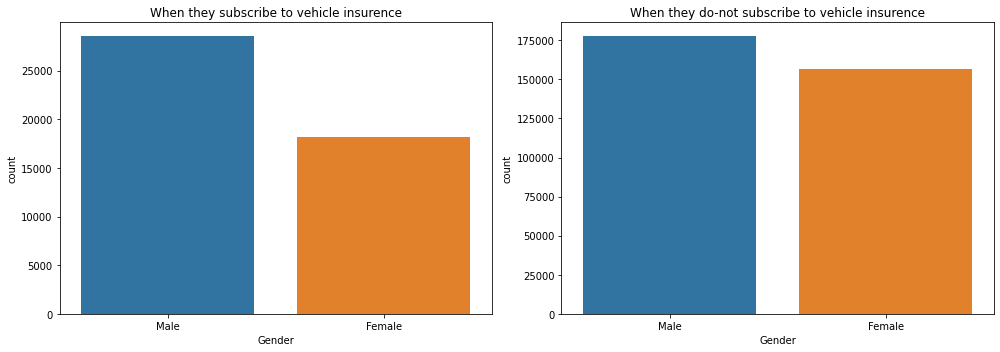

In [20]:
fig, axis = plt.subplots(1, 2, figsize = (14, 5))

sns.countplot(ax = axis[0], x = df[df["Response"] == 1]["Gender"])
axis[0].set_title("When they subscribe to vehicle insurence")

sns.countplot(ax = axis[1], x = df[df["Response"] == 0]["Gender"])
axis[1].set_title("When they do-not subscribe to vehicle insurence")

fig.tight_layout()

In [21]:
j=df["Age"].value_counts()
j

24    25960
23    24256
22    20964
25    20636
21    16457
      ...  
81       56
82       29
83       22
84       11
85       11
Name: Age, Length: 66, dtype: int64

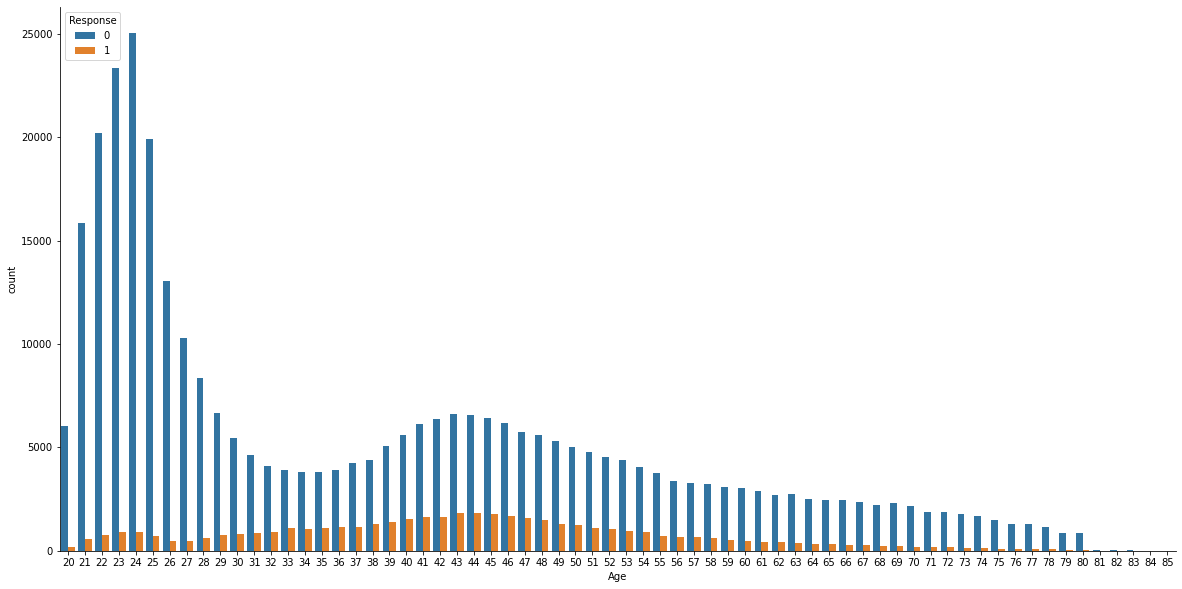

In [22]:

#Age VS Response
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Response',data=df)
sns.despine()

/home/zammath/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

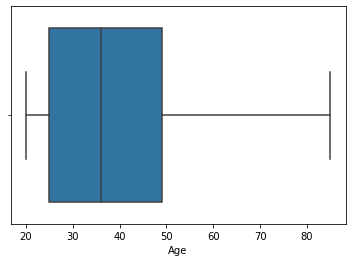

In [23]:
sns.boxplot(df['Age'])

 Young people below 30 are not interested in vehicle insurance. Reasons could be lack of experience, less maturity level and they don't have expensive vehicles yet.
 
People aged between 30-60 are more likely to be interested.

From the boxplot we can see that there no outlier in the data.

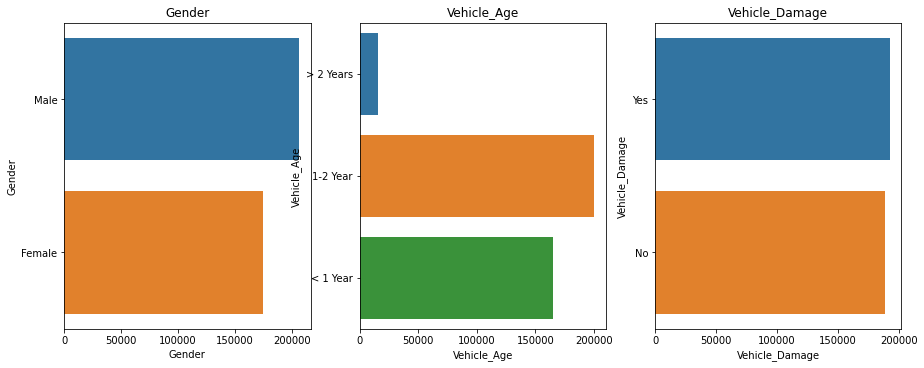

In [24]:
#find Categorical features
plt.figure(figsize=(15,80),facecolor="white")
plotnumber=1
for categorical_feature in categorical_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

1 Male=206089 Female=175020

2 The gender variable in the dataset is almost equally distributed.

3 Customers with vechicle age 1-2 years are more likely to interested as compared to the other two

4 Customers with with Vehicle_Age <1 years have very less chance of buying Insurance



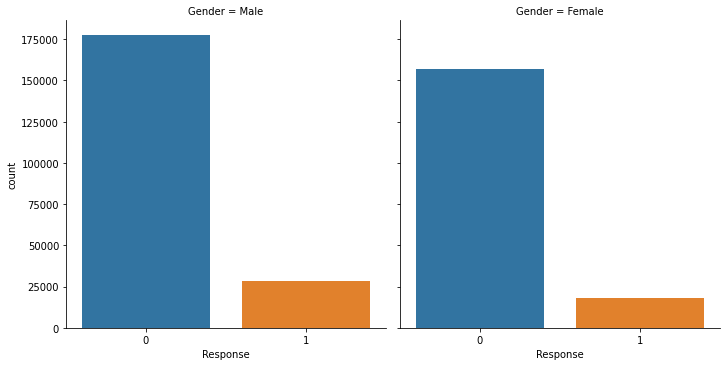

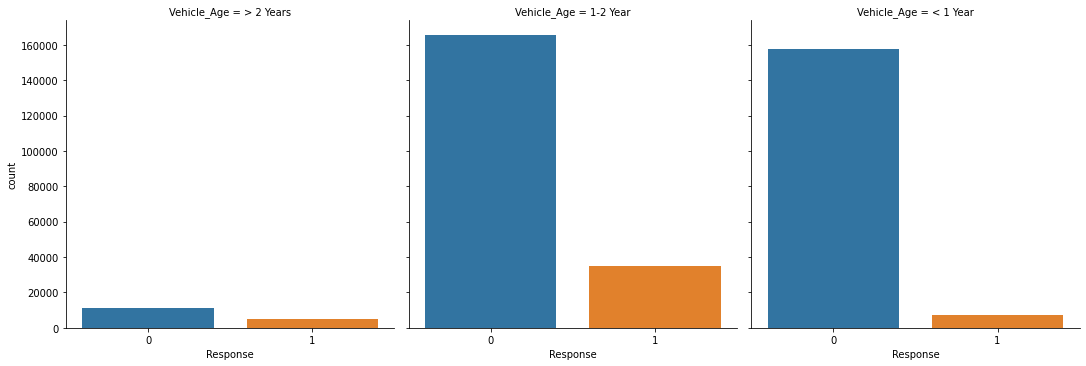

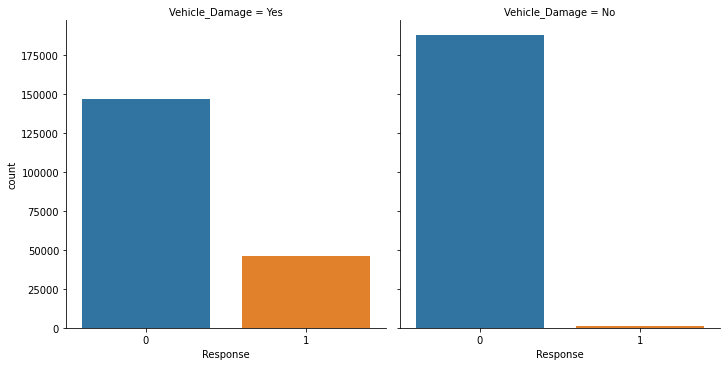

In [25]:
#Relation between categorical feature and response
for categorical_feature in categorical_features:
    sns.catplot(x='Response', col=categorical_feature,kind='count',data=df)
plt.show()

1 Males have more response than female

2 Vehicle_age 1 to 2 year is more interseted to take response <1year

3 Veicle_age>2 no intersted to take respose

4 Vehicle damage=yes more intersted to take response than no Vehicle_Damage

In [26]:
for categorical_feature in categorical_features:
    print(df.groupby(['Response',categorical_feature]).size())

Response  Gender
0         Female    156835
          Male      177564
1         Female     18185
          Male       28525
dtype: int64
Response  Vehicle_Age
0         1-2 Year       165510
          < 1 Year       157584
          > 2 Years       11305
1         1-2 Year        34806
          < 1 Year         7202
          > 2 Years        4702
dtype: int64
Response  Vehicle_Damage
0         No                187714
          Yes               146685
1         No                   982
          Yes                45728
dtype: int64


In [27]:
#visualization of numerical variables
df[numerical_features].head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,44,1,28.0,0,40454.0,26.0,217
1,2,76,1,3.0,0,33536.0,26.0,183
2,3,47,1,28.0,0,38294.0,26.0,27
3,4,21,1,11.0,1,28619.0,152.0,203
4,5,29,1,41.0,1,27496.0,152.0,39


In [28]:
#continous feature
continuous_features=[feature for feature in numerical_features if feature not in discrete_features+['Response']]
print("continuous feature:{}".format(len(continuous_features)))

continuous feature:6


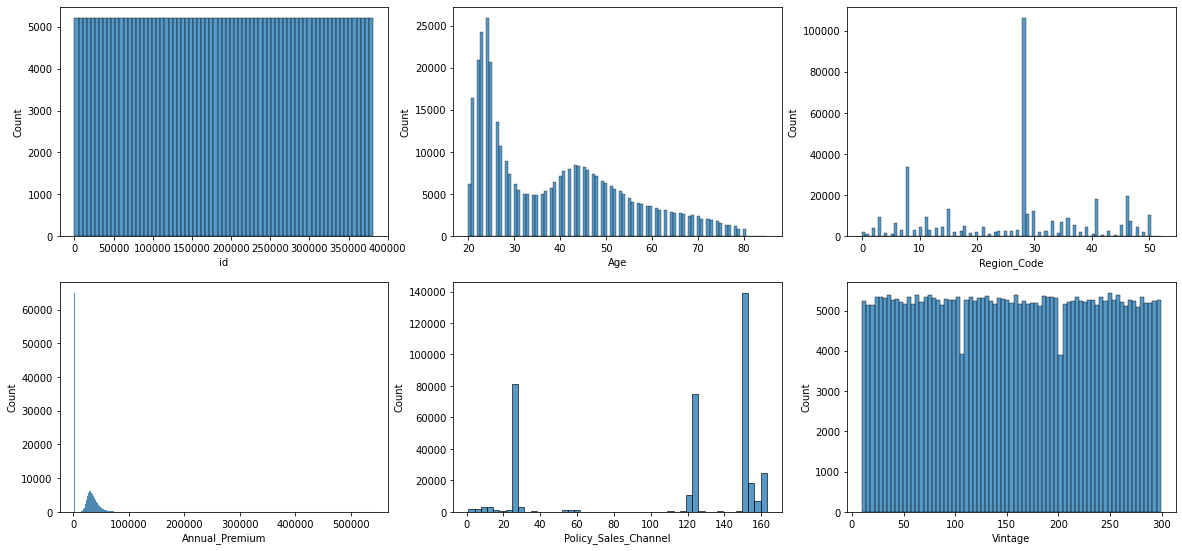

In [29]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.histplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

From the distribution plot we can infer that the annual premimum variable is right skewed

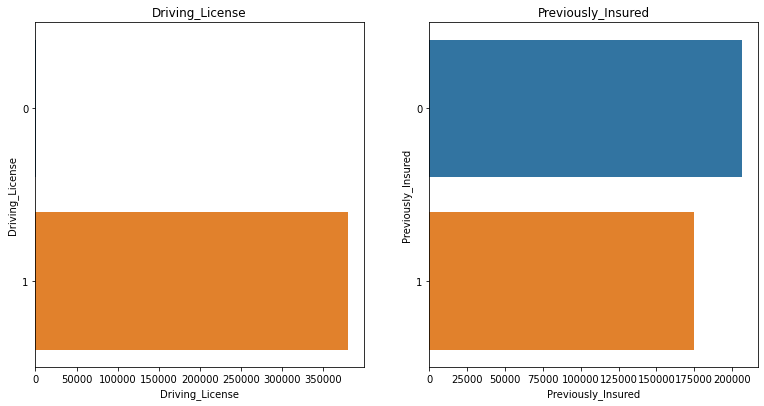

In [30]:
#visulaize discrete data
plt.figure(figsize=(20,90),facecolor="white")
plotnumber=1
for discrete_feature in discrete_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.countplot(y=discrete_feature,data=df)
    plt.xlabel(discrete_feature)
    plt.title(discrete_feature)
    plotnumber+=1
plt.show()

In [31]:
df['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

In [32]:
df['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

1 in this dataser More number of persons have driving Liscense(have driving license have response)

2 Previously insured persons have less response

/home/zammath/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


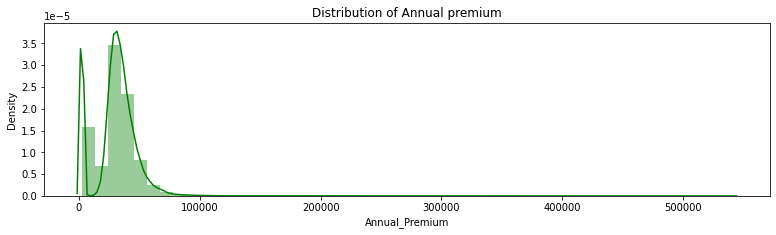

/home/zammath/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


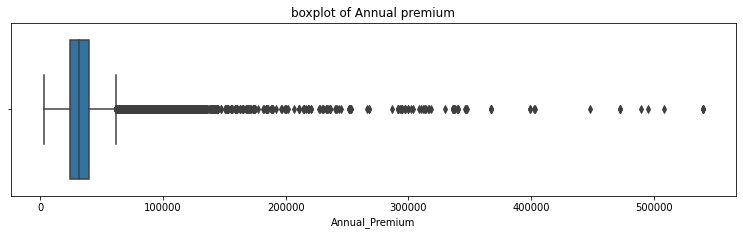

In [33]:
plt.figure(figsize=(13,7))
plt.subplot(2,1,1)
sns.distplot(df['Annual_Premium'], color='green')
plt.title("Distribution of Annual premium")
plt.show()
plt.figure(figsize=(13,7))
plt.subplot(2,1,2)
sns.boxplot(df['Annual_Premium'])
plt.title("boxplot of Annual premium")
plt.show()


1 From the distribution plot we can infer that the annual premimum variable is right skewed

2 From the boxplot we can observe lot of outliers in the variable

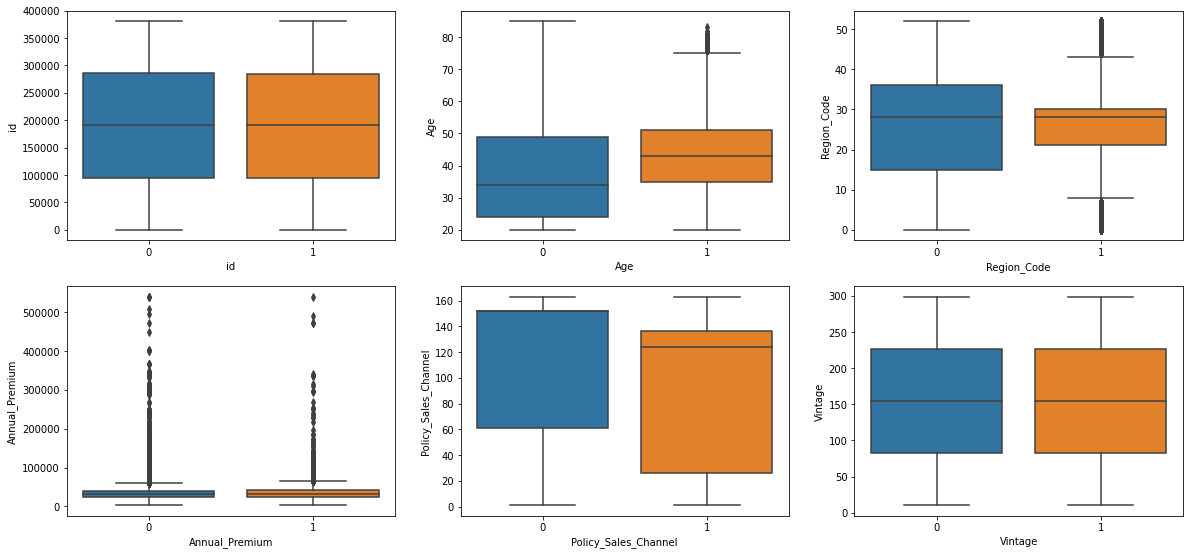

In [34]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="Response", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

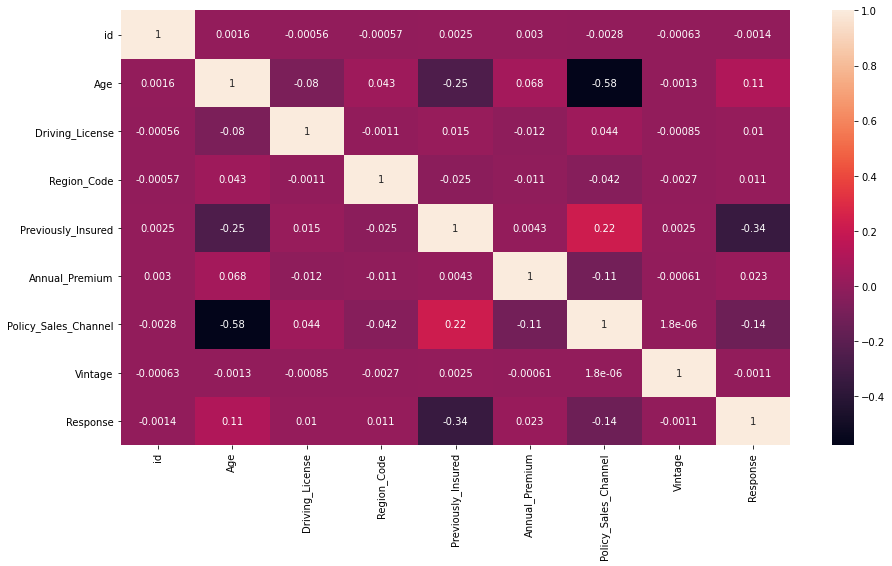

In [35]:
#Explore the correlation between numerical feature
cor=df.corr()
plt.figure(figsize=(15, 8))

sns.heatmap(cor,annot=True)

plt.show()

In [36]:
df1=df.copy()

In [37]:
df1=df1.drop("id",axis=1)

In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['Gender']= le.fit_transform(df1['Gender'])

le1=LabelEncoder()
df1['Vehicle_Age']= le1.fit_transform(df1['Vehicle_Age'])

le2=LabelEncoder()
df1['Vehicle_Damage']= le2.fit_transform(df1['Vehicle_Damage'])


In [39]:
df1

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,1,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26.0,1,0,0,30170.0,26.0,88,0
381105,1,30,1,37.0,1,1,0,40016.0,152.0,131,0
381106,1,21,1,30.0,1,1,0,35118.0,160.0,161,0
381107,0,68,1,14.0,0,2,1,44617.0,124.0,74,0


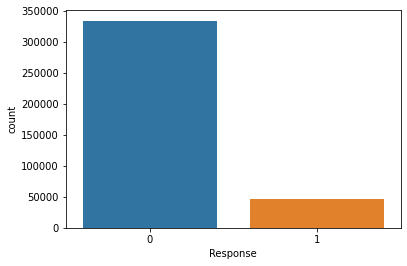

In [40]:
sns.countplot(x='Response',data=df1)
plt.show()

the dataset seems to be unbalanced

In [41]:
df1['Response'].value_counts()

# This Data is imbalance oversampling is needed or Smote is required

0    334399
1     46710
Name: Response, dtype: int64

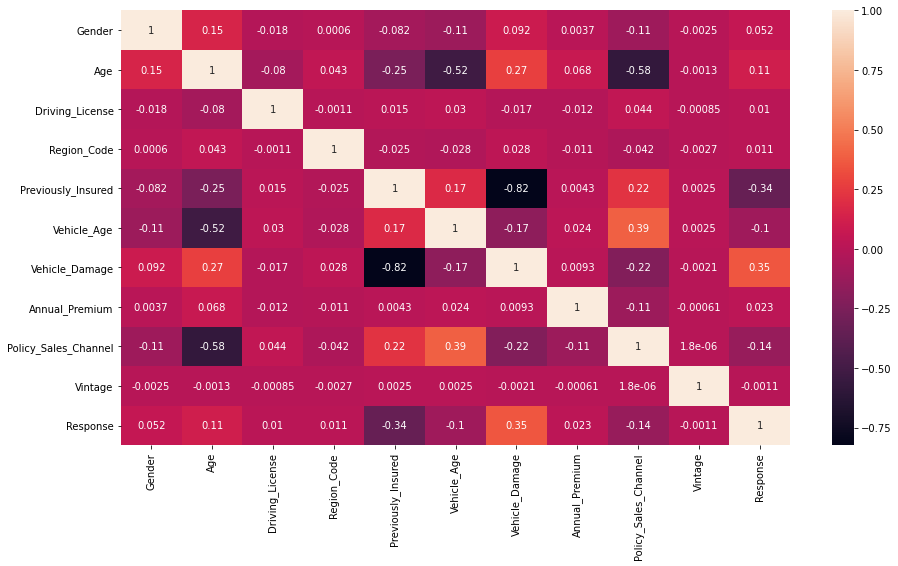

In [42]:
#Explore the correlation between numerical feature
cor=df1.corr()
plt.figure(figsize=(15, 8))

sns.heatmap(cor,annot=True)

plt.show()

In [43]:
correlation = df1.corr()
correlation['Response'].sort_values(ascending = False)

Response                1.000000
Vehicle_Damage          0.354400
Age                     0.111147
Gender                  0.052440
Annual_Premium          0.022575
Region_Code             0.010570
Driving_License         0.010155
Vintage                -0.001050
Vehicle_Age            -0.104078
Policy_Sales_Channel   -0.139042
Previously_Insured     -0.341170
Name: Response, dtype: float64

Driving_License ,Vintage ,Vehicle_Age,Policy_Sales_Channel,Previously_Insured are negatively correlated .we delete this columns            
   
    

In [44]:
df2 = df1.drop(["Vintage", "Vehicle_Age", "Policy_Sales_Channel","Previously_Insured","Driving_License"], axis=1)

In [45]:
df2

,Gender,Age,Region_Code,Vehicle_Damage,Annual_Premium,Response
0,1,44,28.0,1,40454.0,1
1,1,76,3.0,0,33536.0,0
2,1,47,28.0,1,38294.0,1
3,1,21,11.0,0,28619.0,0
4,0,29,41.0,0,27496.0,0
...,...,...,...,...,...,...
381104,1,74,26.0,0,30170.0,0
381105,1,30,37.0,0,40016.0,0
381106,1,21,30.0,0,35118.0,0
381107,0,68,14.0,1,44617.0,0


In [46]:
X=df2.iloc[:,0:-1]
y=df2.iloc[:,-1]

### Handling Imbalanced data
 When observation in one class is higher than the observation in other classes then there exists a class imbalance. We can clearly see that there is a huge difference between the data set. Solving this issue we use resampling technique.

Original dataset shape Counter({0: 334399, 1: 46710})
Resampled dataset shape Counter({1: 334399, 0: 334399})


/home/zammath/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Response', ylabel='count'>

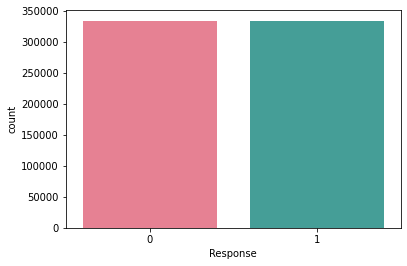

In [47]:
from imblearn.over_sampling import RandomOverSampler
randomsample=  RandomOverSampler()
x_new,y_new=randomsample.fit_resample(X,y)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(y_new,palette='husl')

In [48]:
#dividing the dataset into training and testing
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=.30,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(468158, 5) (200640, 5) (468158,) (200640,)


 ##Model Selection
 
 Problem can be identified as Binary Classification (wheather customer opts for vehicle insurance or not)

 Dataset has more than 300k records

In [49]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

##Logistick regression 

In [50]:
from sklearn.linear_model import LogisticRegression
lgmodel=LogisticRegression()
lgmodel.fit(x_train,y_train)
lgpred=lgmodel.predict(x_test)
lg_probability =lgmodel.predict_proba(x_test)[:,1]

In [51]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
acc_lg=accuracy_score(y_test,lgpred)
recall_lg=recall_score(y_test,lgpred)
precision_lg=precision_score(y_test,lgpred)
f1score_lg=f1_score(y_test,lgpred)
AUC_LR=roc_auc_score(lgpred,y_test)
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,lgpred))
print("ROC_AUC Score:",AUC_LR)

Accuracy :  0.7700458532695375
ROC_AUC Score: 0.8272861080920507


In [52]:
print(classification_report(lgpred,y_test))

              precision    recall  f1-score   support

           0       0.56      0.96      0.71     58372
           1       0.98      0.69      0.81    142268

    accuracy                           0.77    200640
   macro avg       0.77      0.83      0.76    200640
weighted avg       0.86      0.77      0.78    200640



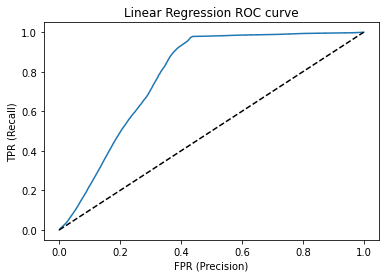

In [53]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, lg_probability)

plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[56281 44047]
 [ 2091 98221]]


<AxesSubplot:>

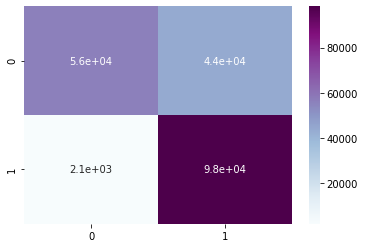

In [54]:
cm=confusion_matrix(y_test,lgpred)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

Random Forest Classification

In [55]:
from sklearn.ensemble import RandomForestClassifier

randommodl = RandomForestClassifier()
randommodl.fit(x_train, y_train)
randompred = randommodl.predict(x_test)


In [58]:
RF_probability = randommodl.predict_proba(x_test)[:,1]
AUC_RF=roc_auc_score(randompred,y_test)
acc_random=accuracy_score(y_test,randompred)
recall_random=recall_score(y_test,randompred)
precision_random=precision_score(y_test,randompred)
f1score_rf=f1_score(y_test,randompred)

print(accuracy_score(randompred,y_test))
print("ROC_AUC Score:",AUC_RF)

0.908039274322169
ROC_AUC Score: 0.9170572773675013


In [59]:
print(classification_report(randompred,y_test))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90     85573
           1       0.98      0.86      0.91    115067

    accuracy                           0.91    200640
   macro avg       0.91      0.92      0.91    200640
weighted avg       0.92      0.91      0.91    200640



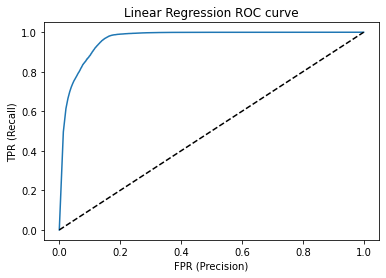

In [60]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, RF_probability)

plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[83725  1848]
 [16603 98464]]


<AxesSubplot:>

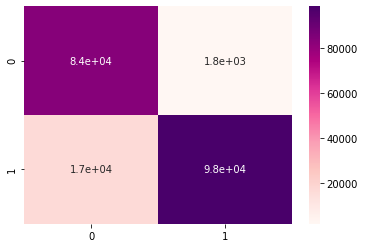

In [63]:
cm=confusion_matrix(randompred,y_test)
print(cm)
sns.heatmap(cm,annot=True,cmap='RdPu')

#XGB classifier 

In [65]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train, y_train)
y_predict = xgb.predict(x_test)
XGB_probability =xgb.predict_proba(x_test)[:,1]

acc_xgb=accuracy_score(y_test,y_predict)
recall_xgb=recall_score(y_test,y_predict)
precision_xgb=precision_score(y_test,y_predict)
f1score_xgb=f1_score(y_test,y_predict)

AUC_xgb=roc_auc_score(y_predict,y_test)


print(accuracy_score(y_predict,y_test))
print("ROC_AUC Score:",AUC_xgb)

[21:17:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.793640350877193
ROC_AUC Score: 0.8166489828756235


In [66]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.66      0.90      0.76     73284
           1       0.93      0.73      0.82    127356

    accuracy                           0.79    200640
   macro avg       0.79      0.82      0.79    200640
weighted avg       0.83      0.79      0.80    200640



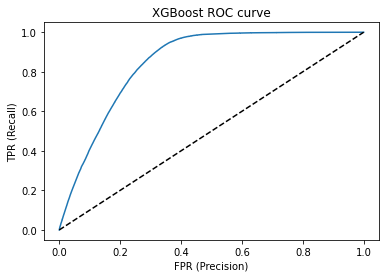

In [68]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, XGB_probability)

plt.title('XGBoost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[66104 34224]
 [ 7180 93132]]


<AxesSubplot:>

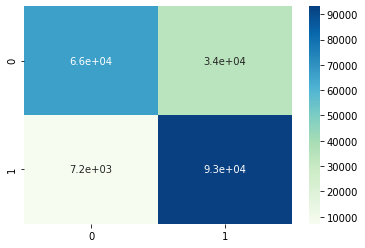

In [69]:
#it helps to identify how many values are classified correctly
cm=confusion_matrix(y_test,y_predict)
print(cm)
sns.heatmap(cm,annot=True,cmap='GnBu')

The ML model for the problem statement was created using python with the help of the dataset, and the ML model created with Random Forest and XGBClassifier models performed better than Logistics Regression model. Thus, for the given problem, the models created by Random Forest and XGBClassifier.

# Conclusion

1 Customers of age between 30 to 60 are more likely to buy insurance.

2 Customers with Driving License have higher chance of buying Insurance.

3 Customers with Vehicle_Damage are likely to buy insurance.

4  The variable such as Age, Previously_insured,Annual_premium  are more afecting the target variable.

5 comparing ROC curve we can see that Random Forest model preform better. Because curves closer to the top-left corner, it indicate a better performance.